### Beam bending calculator

- Currently can solve indeterminate and determinate structures
- Doesnt consider any interaction between axial and bending
- Doesnt determine axial deformations
- Only solves for 1D structures under 2D loading
- Future work:
    - segmental EI along Beam
    - printing results in latex / pdf
    - Properly implement Distibuted Load H

In [1]:
%matplotlib inline
from indeterminatebeam import Beam, Support, DistributedLoadH, DistributedLoadV, PointLoadH, PointLoadV, PointTorque, x, PointLoad

# Go on and play around with the values in this section. See what happens!
### ------------------------------------------------------------------------ ###

##intialise a beam object
beam_1 = Beam(5)                   ##intialises a 5m long beam (assuming E = 2*10**5 MPa, I = 6*10**7 mm4 )
beam_2 = Beam(5, E=1000, I=1000)   ##intialises a 5m long beam assigning E and I.

##create support objects
a = Support(0,(1,1,1))      ##defines a fixed support at point 0m point
b = Support(2,(0,1,0))      ##defines a roller support restaint only in the y direction at 2m point
c = Support(5,(1,1,0))      ##defines pinned support at 5m point

##add supports to beam object
beam_1.add_supports(a,b,c)        ##create a statically indeterminate beam
beam_2.add_supports(a,b,c)        ##intially create as a statically indeterminate beam
beam_2.remove_supports(a)         ##remove support a to make beam statically determinate

##create load objects
load_1 = PointLoad(1,3,45)            ##create a point load of force 1kn acting at 3m point on beam, inclined at 
                                      ##45 degrees to horizontal. Positive indicates
load_2 = DistributedLoadV(2,(0,1))    ##create a 2KN/m UDL from 0m to 1m point
load_3 = PointTorque(3,4)             ##assign a point torque of 3kN.m at 4m point

##add load objects to beams
beam_1.add_loads(load_1,)                    ##add load_1 object to beam 1
beam_1.add_loads(load_2,load_3)              ##add load_2 and load_3 object to beam 1
beam_2.add_loads(load_1, load_2, load_3)     ##add load_1, load_2, load_3 object to beam 2
beam_2.remove_loads(load_2)                  ##remove load 2 object from beam 2

##compute solutions for beams
beam_1.analyse()                             ##now that beam is all set up can solve for external and internal forces
beam_2.analyse()                                


ModuleNotFoundError: No module named 'model'

In [ ]:
##get determinancy of beams
det_1 = beam_1.check_determinancy()
det_2 = beam_2.check_determinancy()
print("The Beam determinancy is below")
print(f"beam_1 has a determinancy: {det_1}")
print(f"beam_2 has a determinancy: {det_2}")

In [ ]:
#get info on the supports for a beam
beam_1.get_support_details()

In [ ]:
##query for the data at a specfic point
print("bending moments at 3m: " + str(beam_1.get_bending_moment(3)))
print("shear forces at 1,2,3,4,5m points: " + str(beam_1.get_shear_force(1,2,3,4,5)))
print("normal force absolute max: " + str(beam_1.get_normal_force(return_absmax=True)))
print("deflection max: " + str(beam_1.get_deflection(return_max = True)))

##add a query point to a plot (adds values on plot)
beam_1.add_query_points(3)


In [ ]:
## plot the results for the beam and save them as a pdf
print("Beam 1:\n\n")
fig_1 = beam_1.plot()
print("\n\nBeam 2:\n\n")
fig_2 = beam_2.plot()

##save the results as a pdf (optional)
#fig.savefig("./results.pdf")


0

1
8.906
16.875


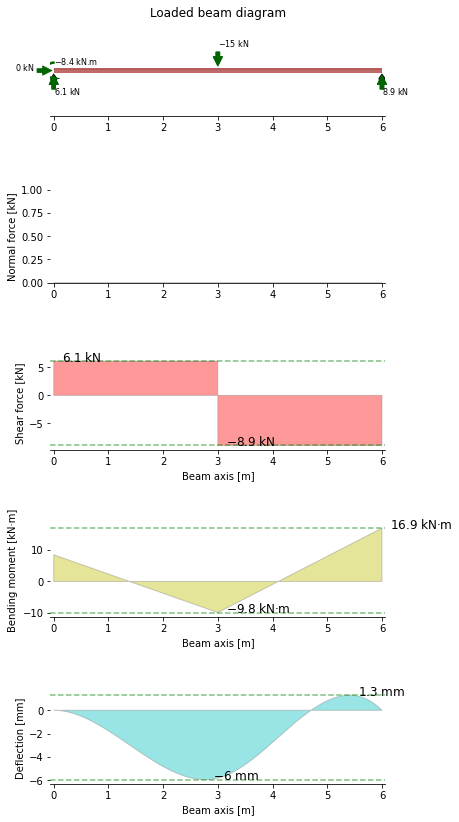

In [5]:
##example 4.17 https://engineering.purdue.edu/~ce474/Docs/Beam_Examples02.pdf
%matplotlib inline
from indeterminatebeam import Beam, Support, DistributedLoadH, DistributedLoadV, PointLoadH, PointLoadV, PointTorque, x, PointLoad

beam = Beam(6)

a = Support()
c = Support(6,(0,1,0))

beam.add_supports(a,c)
beam.add_loads(PointLoadV(-15,3))

beam.analyse()

print(beam.check_determinancy())
print(beam.get_shear_force(return_absmax=True))
print(beam.get_bending_moment(return_absmax=True))
fig = beam.plot()
fig.savefig("./results.png")

0

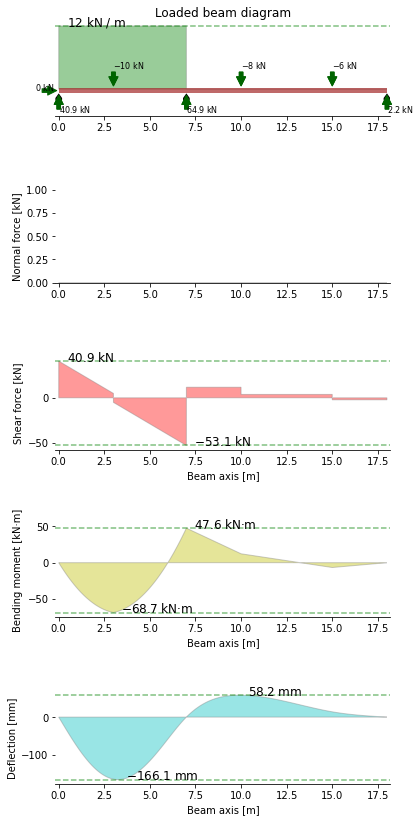

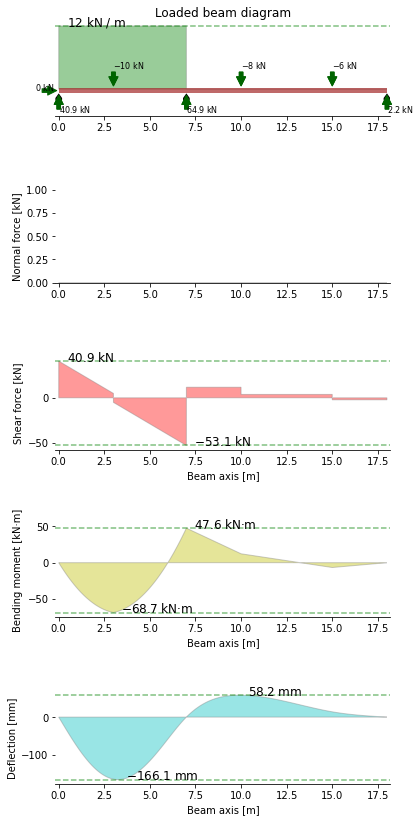

In [3]:
##EXAMPLE 4.27, doesnt align with their calculations but aligns with other beam calculators.
%matplotlib inline
from indeterminatebeam import Beam, Support, DistributedLoadH, DistributedLoadV, PointLoadH, PointLoadV, PointTorque, x,PointLoad

beam = Beam(18)

a = Support(0,(1,1,0))
c = Support(7,(0,1,0))
f = Support(18,(0,1,0))

b = PointLoadV(-10, 3)
d = PointLoadV(-8, 10)
e = PointLoadV(-6, 15)

ac = DistributedLoadV(-12, (0,7))

beam.add_supports(a,c,f)
beam.add_loads(b,d,e,ac)
beam.analyse()
beam.plot()

You can now go back up and continue to play around choosing different loads, beam lengths and placement of the beam supports.
Add as many loads as you want to the list.

After you have made some changes, run the code cell again to calculate your new results.

When you are comfortable with that, check what happens if you try more interesting expressions for the distributed loads, for example:

```python
DistributedLoadV("2 * x**2 + cos(5)", (0, 3))
```
By the way, a double asterisk is how you write a power in Python: ```"2 * x**2 + cos(5)"``` means $2x^2 + \cos(5)$

**Note:** you can also try to include trigonometric functions, but in this case the whole mathematical expression __must be surrounded by quotation marks__, just as in the example above.

More examples have been included below.